<a href="https://colab.research.google.com/github/och0415/Introduction-to-Optical-Remote-Exploration-CN7500474-001-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.4 MB/s 


In [3]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
from rasterio.plot import show
from scipy.spatial import distance

In [6]:
! gdown --id 1lW_w_wIPZB4vieQCrncCkap6LPplgSxi
pic_total = "00_(18) (1).jpg"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lW_w_wIPZB4vieQCrncCkap6LPplgSxi
To: /content/00_(18) (1).jpg
100% 3.38k/3.38k [00:00<00:00, 5.42MB/s]


In [7]:
os.path.isfile(pic_total)

True

In [8]:
Total_img = rasterio.open(pic_total)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


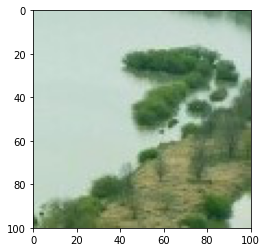

In [9]:
show(Total_img)

In [10]:
type(Total_img)

rasterio.io.DatasetReader

In [11]:
I_total = Total_img.read()

In [12]:
I_total.shape

(3, 100, 100)

In [13]:
type(I_total)

numpy.ndarray

In [14]:
I_total = np.swapaxes(I_total, 0, 2)

In [15]:
I_total.shape

(100, 100, 3)

In [16]:
X_total = I_total.reshape((100*100, 3))

In [17]:
X_total.shape

(10000, 3)

In [18]:
import PIL.Image as pilimg

In [19]:
im = pilimg.open( pic_total )

In [20]:
pix_total = np.array(im)

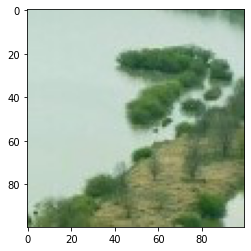

In [21]:
plt.imshow(pix_total)

In [22]:
pix_total

array([[[195, 216, 207],
        [194, 215, 206],
        [194, 215, 206],
        ...,
        [ 72, 108,  80],
        [ 77, 113,  85],
        [ 83, 119,  91]],

       [[195, 216, 207],
        [194, 215, 206],
        [194, 215, 206],
        ...,
        [ 76, 110,  83],
        [ 76, 110,  83],
        [ 78, 112,  85]],

       [[195, 216, 207],
        [194, 215, 206],
        [194, 215, 206],
        ...,
        [ 86, 120,  93],
        [ 82, 116,  89],
        [ 77, 111,  84]],

       ...,

       [[ 60,  88,  50],
        [ 52,  78,  41],
        [135, 161, 122],
        ...,
        [200, 214, 199],
        [200, 214, 197],
        [200, 214, 197]],

       [[ 72, 100,  62],
        [ 82, 108,  69],
        [111, 138,  97],
        ...,
        [199, 213, 196],
        [199, 213, 196],
        [198, 212, 195]],

       [[103, 131,  93],
        [106, 132,  93],
        [136, 163, 122],
        ...,
        [199, 213, 196],
        [198, 212, 195],
        [198, 213, 194]]

In [23]:
pix_total = np.reshape(pix_total, (100*100,-1))

In [24]:
pix_total

array([[195, 216, 207],
       [194, 215, 206],
       [194, 215, 206],
       ...,
       [199, 213, 196],
       [198, 212, 195],
       [198, 213, 194]], dtype=uint8)

In [25]:
pix_total = np.array(pix_total)

In [26]:
df_total = pd.DataFrame(pix_total)

In [27]:
df_total

,0,1,2
0,195,216,207
1,194,215,206
2,194,215,206
3,194,215,206
4,195,216,207
...,...,...,...
9995,203,216,199
9996,200,214,197
9997,199,213,196
9998,198,212,195


In [28]:
df_total.columns=["R","G","B"]

In [29]:
df_total

,R,G,B
0,195,216,207
1,194,215,206
2,194,215,206
3,194,215,206
4,195,216,207
...,...,...,...
9995,203,216,199
9996,200,214,197
9997,199,213,196
9998,198,212,195


In [32]:
! gdown --id 1rx0M-zyvIIzDHed6JjAnjyC7nMKjKHRa
pic_water = "water.jpg.jpg"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rx0M-zyvIIzDHed6JjAnjyC7nMKjKHRa
To: /content/water.jpg.jpg
100% 291/291 [00:00<00:00, 499kB/s]


In [33]:
im_water = pilimg.open( pic_water )

In [34]:
pix_water = np.array(im_water)

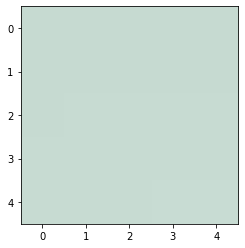

In [35]:
plt.imshow(pix_water)

In [36]:
pix_water

array([[[198, 218, 209],
        [198, 218, 209],
        [198, 218, 209],
        [198, 218, 209],
        [198, 218, 209]],

       [[198, 218, 209],
        [198, 218, 209],
        [198, 218, 209],
        [198, 218, 209],
        [198, 218, 209]],

       [[198, 218, 209],
        [199, 219, 210],
        [199, 219, 210],
        [199, 219, 210],
        [199, 219, 210]],

       [[199, 219, 210],
        [199, 219, 210],
        [199, 219, 210],
        [199, 219, 210],
        [199, 219, 210]],

       [[199, 219, 210],
        [199, 219, 210],
        [199, 219, 210],
        [200, 220, 211],
        [200, 220, 211]]], dtype=uint8)

In [37]:
pix_water = np.reshape(pix_water, (5*5, -1))

In [38]:
pix_water

array([[198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [198, 218, 209],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [199, 219, 210],
       [200, 220, 211],
       [200, 220, 211]], dtype=uint8)

In [39]:
pix_water = np.array(pix_water)

In [40]:
df_water = pd.DataFrame(pix_water)

In [41]:
df_water

,0,1,2
0,198,218,209
1,198,218,209
2,198,218,209
3,198,218,209
4,198,218,209
5,198,218,209
6,198,218,209
7,198,218,209
8,198,218,209
9,198,218,209


In [42]:
df_water.columns=["R","G","B"]

In [43]:
df_water

,R,G,B
0,198,218,209
1,198,218,209
2,198,218,209
3,198,218,209
4,198,218,209
5,198,218,209
6,198,218,209
7,198,218,209
8,198,218,209
9,198,218,209


In [44]:
# water = 0
df_water['Class']='0'
df_water.head(25)

,R,G,B,Class
0,198,218,209,0
1,198,218,209,0
2,198,218,209,0
3,198,218,209,0
4,198,218,209,0
5,198,218,209,0
6,198,218,209,0
7,198,218,209,0
8,198,218,209,0
9,198,218,209,0


In [45]:
water_train=df_water.to_numpy()

In [46]:
water_train

array([[198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [200, 220, 211, '0'],
       [200, 220, 211, '0']], dtype=object)

In [47]:
! gdown --id 1LkTbH5RpFDUbPGeAwp8BMRgjmery7gT9
pic_grass = "grass.jpg.jpg"
     

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LkTbH5RpFDUbPGeAwp8BMRgjmery7gT9
To: /content/grass.jpg.jpg
100% 317/317 [00:00<00:00, 475kB/s]


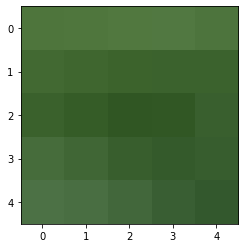

In [48]:
im_grass = pilimg.open( pic_grass )
pix_grass = np.array(im_grass)
plt.imshow(pix_grass)

In [49]:
pix_grass = np.reshape(pix_grass, (5*5, -1))

In [50]:
pix_grass = np.array(pix_grass)

In [51]:
df_grass = pd.DataFrame(pix_grass)

In [52]:
df_grass.columns=["R","G","B"]

In [53]:
df_grass

,R,G,B
0,78,117,60
1,79,118,61
2,81,120,63
3,81,120,65
4,77,116,61
5,66,105,50
6,63,102,47
7,60,99,44
8,59,98,45
9,59,98,45


In [54]:
# grass = 1
df_grass['Class']='1'
df_grass.head(25)
     

,R,G,B,Class
0,78,117,60,1
1,79,118,61,1
2,81,120,63,1
3,81,120,65,1
4,77,116,61,1
5,66,105,50,1
6,63,102,47,1
7,60,99,44,1
8,59,98,45,1
9,59,98,45,1


In [55]:
grass_train=df_grass.to_numpy()
grass_train

array([[78, 117, 60, '1'],
       [79, 118, 61, '1'],
       [81, 120, 63, '1'],
       [81, 120, 65, '1'],
       [77, 116, 61, '1'],
       [66, 105, 50, '1'],
       [63, 102, 47, '1'],
       [60, 99, 44, '1'],
       [59, 98, 45, '1'],
       [59, 98, 45, '1'],
       [58, 97, 44, '1'],
       [53, 92, 39, '1'],
       [48, 86, 35, '1'],
       [49, 87, 36, '1'],
       [57, 95, 46, '1'],
       [70, 108, 59, '1'],
       [64, 102, 53, '1'],
       [56, 94, 45, '1'],
       [52, 90, 43, '1'],
       [55, 93, 46, '1'],
       [76, 113, 69, '1'],
       [73, 110, 66, '1'],
       [66, 103, 59, '1'],
       [57, 94, 51, '1'],
       [51, 88, 45, '1']], dtype=object)

In [59]:
! gdown --id 1VB2zsb5cY4rQeNwPHX83unS2xlq1MdGR
pic_soil = "soil.jpg.jpg"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VB2zsb5cY4rQeNwPHX83unS2xlq1MdGR
To: /content/soil.jpg.jpg
100% 318/318 [00:00<00:00, 472kB/s]


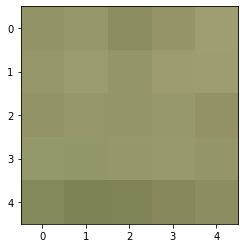

In [60]:
im_soil = pilimg.open( pic_soil )
pix_soil = np.array(im_soil)
plt.imshow(pix_soil)

In [62]:
pix_soil = np.reshape(pix_soil, (5*5, -1))

In [63]:
pix_soil = np.array(pix_soil)
df_soil = pd.DataFrame(pix_soil)
df_soil.columns=["R","G","B"]
df_soil

,R,G,B
0,146,147,103
1,149,150,106
2,139,140,96
3,149,148,104
4,159,158,114
5,149,150,106
6,154,155,111
7,148,149,105
8,156,155,111
9,158,157,113


In [64]:
df_soil['Class']='2'
df_soil.head(25)

,R,G,B,Class
0,146,147,103,2
1,149,150,106,2
2,139,140,96,2
3,149,148,104,2
4,159,158,114,2
5,149,150,106,2
6,154,155,111,2
7,148,149,105,2
8,156,155,111,2
9,158,157,113,2


In [65]:
soil_train=df_soil.to_numpy()
soil_train

array([[146, 147, 103, '2'],
       [149, 150, 106, '2'],
       [139, 140, 96, '2'],
       [149, 148, 104, '2'],
       [159, 158, 114, '2'],
       [149, 150, 106, '2'],
       [154, 155, 111, '2'],
       [148, 149, 105, '2'],
       [156, 155, 111, '2'],
       [158, 157, 113, '2'],
       [146, 147, 103, '2'],
       [149, 150, 106, '2'],
       [148, 149, 105, '2'],
       [151, 152, 108, '2'],
       [147, 146, 102, '2'],
       [149, 152, 107, '2'],
       [147, 150, 105, '2'],
       [150, 151, 107, '2'],
       [152, 153, 109, '2'],
       [148, 149, 105, '2'],
       [133, 136, 91, '2'],
       [127, 130, 85, '2'],
       [128, 131, 86, '2'],
       [134, 135, 91, '2'],
       [140, 141, 97, '2']], dtype=object)

In [66]:
np_A=np.concatenate((water_train,grass_train,soil_train),axis=0)

In [67]:
np_A

array([[198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [198, 218, 209, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [199, 219, 210, '0'],
       [200, 220, 211, '0'],
       [200, 220, 211, '0'],
       [78, 117, 60, '1'],
       [79, 118, 61, '1'],
       [81, 120, 63, '1'],
       [81, 120, 65, '1'],
       [77, 116, 61, '1'],
       [66, 105, 50, '1'],
       [63, 102, 47, '1'],
       [60, 99, 44, '1'],
       [59, 98, 45, '1'],
       [59, 98, 45, '1'],
       [

In [68]:
df_A = pd.DataFrame(np_A)
df_A

,0,1,2,3
0,198,218,209,0
1,198,218,209,0
2,198,218,209,0
3,198,218,209,0
4,198,218,209,0
...,...,...,...,...
70,133,136,91,2
71,127,130,85,2
72,128,131,86,2
73,134,135,91,2


In [69]:
df_A.columns=["R","G","B","Class"]
df_A

,R,G,B,Class
0,198,218,209,0
1,198,218,209,0
2,198,218,209,0
3,198,218,209,0
4,198,218,209,0
...,...,...,...,...
70,133,136,91,2
71,127,130,85,2
72,128,131,86,2
73,134,135,91,2


In [70]:
X=df_A[['R','G','B']]
X

,R,G,B
0,198,218,209
1,198,218,209
2,198,218,209
3,198,218,209
4,198,218,209
...,...,...,...
70,133,136,91
71,127,130,85
72,128,131,86
73,134,135,91


In [71]:
y=df_A[['Class']]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
70,2
71,2
72,2
73,2


In [74]:
X_random=df_total.sample(n=40,replace=False,random_state=500)
X_random

,R,G,B
5503,196,216,207
6376,104,116,80
3861,87,123,62
1308,200,220,211
6380,115,125,88
675,191,213,201
401,195,216,207
323,196,216,207
5783,92,116,82
7693,129,135,91


In [75]:
X_random['Class']='0'
X_random.head(40)

,R,G,B,Class
5503,196,216,207,0
6376,104,116,80,0
3861,87,123,62,0
1308,200,220,211,0
6380,115,125,88,0
675,191,213,201,0
401,195,216,207,0
323,196,216,207,0
5783,92,116,82,0
7693,129,135,91,0


In [76]:
X_random.loc[7693,'Class']='2'
X_random.loc[9532,'Class']='2'
X_random.loc[7606,'Class']='0'
X_random.loc[4962,'Class']='1'
X_random.loc[2162,'Class']='1'
X_random.loc[7320,'Class']='0'
X_random.loc[2293,'Class']='0'
X_random.loc[9954,'Class']='2'
X_random.loc[7295,'Class']='2'
X_random.loc[5783,'Class']='1'

In [77]:
X_random

,R,G,B,Class
5503,196,216,207,0
6376,104,116,80,0
3861,87,123,62,0
1308,200,220,211,0
6380,115,125,88,0
675,191,213,201,0
401,195,216,207,0
323,196,216,207,0
5783,92,116,82,1
7693,129,135,91,2


In [78]:
X_new=X_random[['R','G','B']]
X_new

,R,G,B
5503,196,216,207
6376,104,116,80
3861,87,123,62
1308,200,220,211
6380,115,125,88
675,191,213,201
401,195,216,207
323,196,216,207
5783,92,116,82
7693,129,135,91


In [79]:
y_new=X_random[['Class']]
y_new

,Class
5503,0
6376,0
3861,0
1308,0
6380,0
675,0
401,0
323,0
5783,1
7693,2


In [80]:
X.dtypes

R    object
G    object
B    object
dtype: object

In [104]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter